In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation,LSTM
from keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import glob
import random

In [2]:
x = []
y = []
for gambar in glob.glob("dataset_out/train/bukan_daun/*.jpg"):
  x.append(cv2.imread(gambar))
  y.append(0)
for gambar in glob.glob("dataset_out/train/daun_bercak/*.jpg"):
  x.append(cv2.imread(gambar))
  y.append(1)
for gambar in glob.glob("dataset_out/train/daun_berlubang/*.jpg"):
  x.append(cv2.imread(gambar))
  y.append(2)
for gambar in glob.glob("dataset_out/train/daun_busuk/*.jpg"):
  x.append(cv2.imread(gambar))
  y.append(3)
for gambar in glob.glob("dataset_out/train/daun_sehat/*.jpg"):
  x.append(cv2.imread(gambar))
  y.append(4)
    
z = list(zip(x,y))
random.shuffle(z)
x, y = zip(*z)
x = np.asarray(x)
y = np.asarray(y)

In [3]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers, models

base_model = VGG16(weights="imagenet", include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False


flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(25, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    prediction_layer
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 25)                204825    
                                                                 
 dense_1 (Dense)             (None, 5)                 130       
                                                                 
Total params: 14,919,643
Trainable params: 204,955
Non-trainable params: 14,714,688
_________________________________________________________________


In [5]:
history = model.fit(x, y, batch_size=5, epochs=30, validation_split=0.1)

Epoch 1/30
864/864 [==============================] - 78s 90ms/step - loss: 1.5807 - accuracy: 0.4271 - val_loss: 1.2437 - val_accuracy: 0.5708
Epoch 2/30
864/864 [==============================] - 83s 97ms/step - loss: 0.9861 - accuracy: 0.6164 - val_loss: 0.8085 - val_accuracy: 0.6812
Epoch 3/30
864/864 [==============================] - 81s 94ms/step - loss: 0.6951 - accuracy: 0.7366 - val_loss: 0.6884 - val_accuracy: 0.7167
Epoch 4/30
864/864 [==============================] - 83s 96ms/step - loss: 0.5767 - accuracy: 0.7866 - val_loss: 0.6107 - val_accuracy: 0.7542
Epoch 5/30
864/864 [==============================] - 84s 97ms/step - loss: 0.4775 - accuracy: 0.8194 - val_loss: 0.5655 - val_accuracy: 0.7792
Epoch 6/30
864/864 [==============================] - 86s 100ms/step - loss: 0.4064 - accuracy: 0.8546 - val_loss: 0.5045 - val_accuracy: 0.7979
Epoch 7/30
864/864 [==============================] - 88s 102ms/step - loss: 0.3517 - accuracy: 0.8794 - val_loss: 0.5135 - val_accurac

Text(0.5, 1.0, 'Training and validation loss')

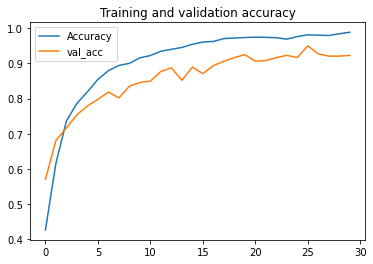

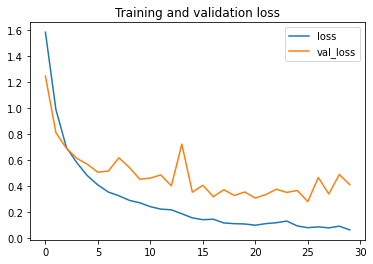

In [6]:
from matplotlib import pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
 
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.legend(["Accuracy","val_acc"])
plt.title('Training and validation accuracy')
 
plt.figure()
 
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(["loss","val_loss"])
plt.title('Training and validation loss')

In [7]:
model.save("vgg25_1_26.h5")

In [8]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

test_set = tf.keras.preprocessing.image_dataset_from_directory('dataset_out/val',
                                            image_size=(128, 128),
                                            batch_size=5,
                                            label_mode='categorical')

Found 600 files belonging to 5 classes.


In [9]:
def pred(model):
    y_val = []
    y_val_pred = []
    for images, targets in test_set:
        for image, target in zip(images, targets):
            img_array = image.numpy().astype("uint8")
            prediction = model.predict(np.array([img_array]))
            y_val_pred.append(np.argmax(prediction))
            y_val.append(np.argmax(target))
            
    return y_val, y_val_pred

In [10]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

y_val, y_val_pred = pred(model)

print('Confusion Matrix :')

1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 34ms/step
Confusion Matrix :


In [11]:
print('Classification Report :')
print(classification_report(y_val, y_val_pred))

Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       0.84      0.69      0.76       120
           2       0.70      0.57      0.63       120
           3       0.87      0.93      0.90       120
           4       0.69      0.91      0.79       120

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.81       600
weighted avg       0.82      0.82      0.81       600



In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix, plot_confusion_matrix, precision_recall_fscore_support, classification_report

In [15]:
accuracy_score(y_val, y_val_pred)

0.8183333333333334

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                           title='Confusion matrix',
                           cmap=plt.cm.Purples):
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
     plt.imshow(cm, interpolation='nearest', cmap=cmap)
     plt.title(title)
     plt.colorbar()
     tick_marks = np.arange(len(classes))
     plt.xticks(tick_marks, classes, rotation=45)
     plt.yticks(tick_marks, classes)

     if normalize:
         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
         print("Normalized confusion matrix")
     else:
         print('Confusion matrix, without normalization')

     print(cm)

     thresh = cm.max() / 2.
     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
         plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

     plt.tight_layout()
     plt.ylabel('Actual label')
     plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[120   0   0   0   0]
 [  0  83  26   6   5]
 [  0   6  68   4  42]
 [  0   8   0 111   1]
 [  0   2   3   6 109]]


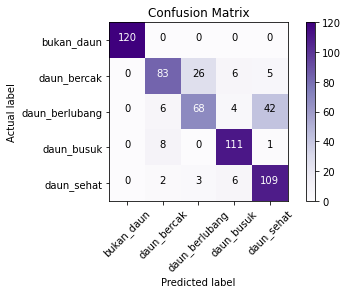

In [21]:
import itertools
cm = confusion_matrix(y_val, y_val_pred)
cm_plot_labels = ['bukan_daun','daun_bercak','daun_berlubang','daun_busuk','daun_sehat']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')